<font color='IndianRed'>
<font size=9> 

**Curso Inferencia Estadística**

<font color = 'DodgerBlue'>
<font size = 5>
    
**Pruebas de normalidad**

<font color = 'Black'>
<font size = 3>

Frecuentemente nos encontramos frente al problema de reconocer si una muestra proviene de una **población gaussiana**.

Aunque ya hemos visto **ajuste de distribuciones**, para el caso de **gaussianas** tenemos más métodos para establecer, con cierta probabilidad, si una muestra proviene realmente de una **distribución normal**. Estos métodos están basados en **pruebas de hipótesis**, donde la **hipótesis nula** tiene la forma **"la población es gaussiana"**, en tanto que la **alternativa** es **"la población no es gaussiana"**.

De esta manera, a cada una de las pruebas se le asigna un **estadístico de contraste** con el cual se calcula un $p$-valor, de modo que podemos escribirlas así:

$$\left\{\begin{array}{l}H_0:\mbox{ la población es gaussiana}\\H_1:\mbox{ la población no es gaussiana}\end{array}\right.$$

> ⚠️ **Nota importante: El p-valor es una **probabilidad** y siempre toma valores $i \in [0,1]$. Si es muy cercano a 1, hay probabilidad de que si haya gaussianidad**.

con **regla de decisión**:

$p$-valor|Decisión|Significado
:--|:--|:--
Pequeño|Rechazar $H_0$|Hay buena probabilidad de que **NO es gaussiana**
Grande|Rechazar $H_1$|Hay buena probabilidad de que **SÍ es gaussiana**

En este capítulo estudiaremos cuatro contrastes, también conocidad como **pruebas de bondad y ajuste** (pruebas paramétricas para verificar si hay gaussianidad) que nos ayudan para este fin:

1. **Prueba de Shapiro-Wilk**: Una de las pruebas más populares y potentes para detectar desviaciones de la normalidad, especialmente en muestras pequeñas.
2. **Prueba de Kolmogorov-Smirnov**: Una prueba basada en la comparación entre la distribución empírica y la distribución normal teórica. 
3. **Prueba de Anderson-Darling**: Una extensión del contraste de Kolmogorov-Smirnov que da más peso a las colas de la distribución.
4. **Prueba de Jarque-Bera**: Evalúa la normalidad basándose en los momentos estadísticos de asimetría y curtosis.

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Contexto e importancia de las pruebas de normalidad**

<font color = 'Black'>
<font size = 3>

En estadística, muchas pruebas y modelos (como **ANOVA**, **regresión lineal**, **t de Student**, entre otros) requieren que los datos sigan una **distribución normal**. Por ello, las **pruebas de normalidad** son un paso esencial para garantizar la validez de los resultados.

Es importante considerar también que:

- **Tamaños de muestra pequeños**: Las pruebas pueden tener poca potencia, y un histograma o gráfico Q-Q puede complementar la evaluación.
- **Tamaños de muestra grandes**: Las pruebas tienden a detectar pequeñas desviaciones que pueden no ser prácticamente significativas.

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Pruebas en Python**

<font color = 'Black'>
<font size = 3>

```python
import numpy as np
import scipy.stats as stats, lognorm
import random


#generada con N(mu=3.5,sigma=2)
small_gauss = [2.9267007, 2.5763093, 4.9931801, 0.6564296, 1.4377333, 7.6412183, 2.9204735] 

#generada con t(3)
big_t = [-0.577103929579228, -0.0669625949987604, 0.123572935953355, -0.524985500797433, -1.23249669279686, 0.509597230395874, -0.729559305649031, -0.41684441016622, 1.28155478163868, 0.924508782035897, 0.827405247774813, 1.59785194962189, -1.47879497630707, -1.26201626124022, -0.0593983026205043, -0.178873361732746, 0.801185847793428, 0.333473064862654, 1.25186288055626, 2.35949695172828, -0.633493106081742, -1.05713142223298, 0.0212461334293823, 0.466063027431909, 0.0762121526958427, -0.843837287109611, -0.104022595760381, 5.78550093074697, 0.709799846598426, -0.0897824055310009, -0.999402655342385, 0.337761665033848, -0.0306307006025367, 1.47728344947859, -0.176164802725808, 0.690341335235668, -0.292183630229324, -0.844902899428558, -3.49551302890857, 1.43006662844371, 1.24850000914668, -0.180820066444685, -0.573485189819109, 0.349757398842014, -2.09754115696913, -0.352572352149588, -0.509125036161415, 0.712742491824159, 0.519051722042105, -3.00737218678664]

#generada con N(mu=5,sigma=1)
rng = np.random.default_rng(2024) # usamos la misma semilla para que salga lo mismo q en la clase
big_gauss = stats.norm(scale = 1, loc = 5).rvs(1000, random_state = rng)
big_gauss[0:10]

# Tomado de https://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%205%20-%20Normality%20Testing.pdf
densidades_mexico = {
    'Region': [
        'Ajuno', 'Angahuan', 'Arantepacua', 'Aranza', 'Charapan', 'Cheran',
        'Cocucho', 'Comachuen', 'Corupo', 'Ihuatzio', 'Janitzio', 'Jaracuaro',
        'Nahuatzen', 'Nurio', 'Paracho', 'Patzcuaro', 'Pichataro',
        'Pomacuaran', 'Quinceo', 'Quiroga', 'San Felipe', 'San Lorenzo',
        'Sevina', 'Tingambato', 'Turicuaro', 'Tzintzuntzan', 'Urapicho'
    ],
    'Population_Density': [
        5.11, 5.15, 5.00, 4.13, 5.10, 5.22, 5.04, 5.25, 4.53, 5.74, 6.63, 5.73,
        4.77, 6.06, 4.82, 4.98, 5.36, 4.96, 5.94, 5.01, 4.10, 4.69, 4.97, 5.01,
        6.19, 4.67, 6.30
    ]
}

# Generada con lognorm con media e y desviación 0.5
np.random.seed(1)
mi_lognorm = stats.lognorm.rvs(s=.5, scale=np.exp(1), size=1000)
mi_lognorm[0:10]
```

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**1. Prueba de Shapiro-Wilk**

<font color = 'Black'>
<font size = 3>

La prueba de **Shapiro-Wilk** evalúa si una muestra sigue una **distribución normal** al calcular un estadístico $W$ basado en el orden de los datos. Funciona bien para tamaños tan bajos como muestras de tamaño 3.

<font color = 'DodgerBlue'>
<font size = 5>
    
**Implementación en Python**

<font color = 'Black'>
<font size = 3>

Usaremos la función `shapiro` de la biblioteca `scipy.stats`.

```python
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f"Estadístico W: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Regla de decisión
if p_value < 0.05:
    print("Rechazamos H0: La muestra no sigue una distribución normal")
else:
    print("No podemos rechazar H0: La muestra sigue una distribución normal")
```

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**2. Prueba de Kolmogorov-Smirnov**

<font color = 'Black'>
<font size = 3>

Esta prueba compara la distribución empírica de los datos con la distribución normal teórica.

La idea sobre esta prueba es la siguiente, usando la **distancia al infinito** o **métrica del supremo**. Imaginemos que tenemos una curva (color azul) y digamos que tenemos una banda (color verde) que es idéntica a la curva azul pero desplazada, por lo que cubre a la curva azul.

Ahora, si tenemos otra curva (color rojo), podemos decir que la curva roja se parece (en el sentido de topología) a la curva azul si queda por dentro de la fraja verde. Si el diámetro de la franja verde es muy pequeña, se podría decir que si queda la curva dentro de ella se parece.

La idea geométrica se muestra en la siguiente imagen:

<img src = "Img/dist_inf.jpg">

Supongamos que tienen tus datos, lo que hace **Kolmogorov-Smirnov** es calcular la **media** y la **desviación** de los datos, luego hace una curva gaussiana con esa **media** y esa **desviación**. Si tus datos son realmente **gaussianos**, al hacer el histograma deberían quedar muy ajustados a esa curva. Es decir, que los rectángulos de ese histograma queden por dentro de esa franja. Así como se muestra en la siguiente imagen:

<img src = "Img/dist_inf2.jpg">

La **métrica del supremo**: 

$$d_\infty(x, y) = \max_{1 \leq i \leq n} |x_i - y_i|$$

esta métrica es la que te define **convergencia de uniforme de funciones**, viene dada por la topología de la **norma del supremo**: 

$$\|f\|_\infty = \sup_{x \in A} |f(x)|$$

<font color = 'DodgerBlue'>
<font size = 5>
    
**Implementación en Python**

<font color = 'Black'>
<font size = 3>

Usaremos la función ``kstest`` de ``scipy.stats``.

```python
from scipy.stats import kstest, norm

# Prueba de Kolmogorov-Smirnov
from statistics import mean, stdev
stat, p_value = kstest(data, 'norm', args=(mean(data), stdev(data)))

print(f"Estadístico KS: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")
```

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**3. Prueba de Anderson-Darling**

<font color = 'Black'>
<font size = 3>

La prueba de Anderson-Darling ajusta el estadístico de Kolmogorov-Smirnov para dar más peso a las colas.

Esta prueba no utiliza el p-valor, utiliza la **región crítica**.

<font color = 'DodgerBlue'>
<font size = 5>
    
**Implementación en Python**

<font color = 'Black'>
<font size = 3>

Usaremos la función ``anderson`` de ``scipy.stats``.

```python
from scipy.stats import anderson

# Prueba de Anderson-Darling
result = anderson(data, dist='norm')

print(f"Estadístico A: {result.statistic:.4f}")
for i, sig in enumerate(result.significance_level):
    print(f"Nivel de significancia {sig}%: Valor crítico = {result.critical_values[i]:.4f}")
```

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**4. Prueba de Jarque-Bera**

<font color = 'Black'>
<font size = 3>

Esta prueba evalúa la normalidad mediante los coeficientes de **asimetría** y **curtosis**.

<font color = 'Black'>
<font size = 3>

Los **momentos** de una **distribución** se definen de la siguiente manera:

$\mu^{\prime}_{n} = E[X^{n}] =  \displaystyle \int_{-\infty}^{\infty} x^{n} \,dF(x)$

donde $X$ es la **variable aleatoria** que tiene esta **distribución** acumulada $F$, y $E$ es la **esperanza** o **media**.

La **media** de una **distribución** es la **esperanza** $E[X]$, está muy relacionada con la **media muestral** $\overline{X}$.

La **varianza** $Var(X) = E[X^{2}] - E[X]^{2}$, como $E[X^{2}]$ es el segundo **momento**. Entonces, la **varianza** está muy relacionada con el segundo **momento**.

La **esperanza** de $E[X^{3}]$ viene siendo el tercer **momento**, está muy relacionad con otro parámetro denominado **asimetría** (es una idea de qué tan iguales son las colas). 

El tercer **momento**, $E[X^{4}]$ es la **curtosis**.

Las **funciones de distribución** también las puedes expresar como una especie de serie de Taylor, donde los coeficientes son los **momentos** $E[X^{n}]$.

Entre más coeficientes conozcas, mejor idea tendrás de cómo es la gráfica de la **distribución**.

<font color = 'DodgerBlue'>
<font size = 5>
    
**Implementación en Python**

<font color = 'Black'>
<font size = 3>
Usaremos la función ``jarque_bera`` de ``scipy.stats``.

```python
from scipy.stats import jarque_bera

# Prueba de Jarque-Bera
stat, p_value = jarque_bera(data)

print(f"Estadístico JB: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

```

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**Algunas consideraciones**

<font color = 'Black'>
<font size = 3>

Las **pruebas de normalidad** deben interpretarse en contexto, especialmente considerando el tamaño de la **muestra**.

- Las representaciones gráficas, como histogramas o diagramas Q-Q, son una herramienta valiosa complementaria.
- Aunque estas pruebas nos ayudan a evaluar la **normalidad**, la robustez de muchos modelos estadísticos permite cierto grado de desviación sin afectar significativamente los resultados.
- Por ejemplo, la prueba **t-test** que vimos en el notebook anterior pide que la **muestra** sea grande o que tengas **gaussianidad**. Per en realidad, te basta que la **muestra** tenga forma de montaña en el histograma.

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Resumen**

<font color = 'Black'>
<font size = 3>

A continuación se muestra una tabla resumen de los contrastes de normalidad. 

**Recordar que para utilizarlos en Python se requieren las bibliotecas de ``scipy.stats`` y/o ``statsmodels``**.

Prueba|Abreviatura|Tamaño de<br> muestra|Desventaja|Estadístico|**Python**
:--|:--:|:--:|:--|:--:|:--
Shapiro-Wilk|SW|$n \leq 5000$|Sensible a valores repetidos y colas|W|``shapiro()``
Kolmogorov-Smirnov|KS|$n \leq 1000$|Requiere especificar parámetros|D|``kstest()``
Anderson-Darling|AD|$n \leq 5000$|Menos eficiente en muestras grandes|A|``anderson()``
Jarque-Bera|JB|$n \geq 20$|Menos sensible a desviaciones pequeñas|JB|``jarque_bera()``

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Consideraciones finales**

<font color = 'Black'>
<font size = 3>

1. **Tamaño de muestra:**
   - Las pruebas como **Shapiro-Wilk** y **Anderson-Darling** son ideales para tamaños de **muestra** pequeños a moderados (hasta 5000 observaciones).
   - **Kolmogorov-Smirnov** se recomienda para tamaños pequeños a medianos (hasta 1000), ya que su eficiencia decrece con **muestras** grandes.
   - **Jarque-Bera** es más confiable en tamaños de **muestra grandes** (n ≥ 20) debido a su dependencia de estadísticos como la **asimetría** y la **curtosis**.

<font color = 'Black'>
<font size = 3>

2. **Repeticiones y valores atípicos:**
   - Las pruebas como **Shapiro-Wilk** pueden verse afectadas por valores **repetidos** o **extremos**, lo que puede comprometer su capacidad para detectar **normalidad**.
   - Esto pasa porque cuando tienes **valores extremos** las colas se van hacer más largas, por lo que puedes tener comportamiento **gaussiando** al centro pero no en las colas.
   - Gráficos complementarios como histogramas o diagramas Q-Q son útiles para identificar patrones visuales antes de realizar pruebas.

<font color = 'Black'>
<font size = 3>

3. **Colas de la distribución:**
   - **Anderson-Darling** da mayor peso a las colas, lo que la hace especialmente útil si se sospechan problemas en los extremos de la **distribución**.

<font color = 'Black'>
<font size = 3>

4. **Pruebas específicas vs. generales:**
   - **Shapiro-Wilk** y **Anderson-Darling** están diseñadas exclusivamente para evaluar **normalidad**.
   - **Jarque-Bera** es una prueba "ómnibus", útil si deseas evaluar otros momentos estadísticos (**asimetría** y **curtosis**) junto con la **normalidad**.

<font color = 'Black'>
<font size = 3>

5. **Efecto del tamaño de muestra:**
   - En **muestras** pequeñas, las pruebas de **normalidad** pueden tener poca potencia y no detectar desviaciones significativas.
   - En **muestras** grandes, incluso pequeñas desviaciones de la **normalidad** pueden resultar en un rechazo de $H_0$, aunque estas desviaciones no sean prácticas ni relevantes para muchos análisis.
   > ⚠️ **Nota importante: No se trata de que apliques una única prueba para ver si hay gaussianidad, sino que apliques tantas como puedas.**.

<font color = 'Black'>
<font size = 3>

6. **Apoyo visual:**
   - Complementar las pruebas estadísticas con visualizaciones como histogramas y diagramas Q-Q es una buena práctica para entender mejor los datos y confirmar los resultados.

<font color = 'Black'>
<font size = 3>

En conclusión, la elección de la prueba depende del tamaño de la **muestra**, las características de los **datos** y la naturaleza del análisis. Las representaciones gráficas son un valioso complemento a estas pruebas formales.

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Comentario final**

<font color = 'Black'>
<font size = 3>

Es importante mencionar que en muchas ocasiones es necesario realizar una **transformación** previa a los **datos** para obtener **gaussianidad**. 

Las **transormaciones** más usuales son **logaritmo**, **raíz cuadrada** y **raíz cúbica**.

Cuando apliques la prueba y te resulte que no es **gaussiana**, aplicas una de esas tres **transormaciones** primero.

Es decir, toma tus **datos** y aplícales un **logaritmo**, y al **logaritmo** de esos datos aplícales la prueba de **gaussiana**. 

Si te arroja de resultado que es **gaussiana**, entonces el **logaritmo** de esos **datos** son **gaussianos**. Entonces, todo lo que conoces de **gaussianidad** se lo puedes aplicar a la columna del **logaritmo**. Ya después al final deshaces el cambio de variable. Lo mismo con la **raíz cuadrada** y **raíz cúbica**.

```python
import numpy as np

datos_log = np.log(datos)
datos_sqrt = np.sqrt(datos)
datos_sqrt3 = np.cbrt(datos)
```

<font color = 'Brown'>
<font size = 4>

---
    
**Notas**

<font color = 'DarkRed'>
<font size = 3>

- El p-valor es una **probabilidad** y siempre toma valores $i$, donde $i \in [0,1]$.
- Cuando tienes presencia de **datos atípicos**, estos pueden afectar las colas de la **distribución**, por lo que es necesario hacer una prueba de normalidad. Podría parecer que al centro si se vea como una gaussiana pero en las colas ya no hay simetría.
- Si tienes una **muestra** pequeña vas a tener problemas, lo que te puede llegar a salvar es ver que pequeña **muestra** es **gaussiana**, porque siendo **gaussiana** ya no te interesa el tamaño, ya que la suma de **gaussianas** es también **gaussiana**, el **promedio** de **gaussianas** es **gaussiana**.
- Cuando no tienes **gaussianidad** el **Teorema del Límite Central** te garantiza que los **promedios** si son **gaussianos**.
- La peor situación es **muestra pequeña** sin **gaussianidad**.
- En **regresiones lineales** nos interesa que los **errores cometidos** se comporten como **distribuciones gaussianas**, si no se comportan como **distribuciones gaussianas** pierdes mucha información en las **regresiones lineales**.
> ⚠️ **Nota importante: Si los errores cometidos no forman una gaussiana, ya valió, ya no puedes continuar**.
- Para **muestras** pequeñas, una última esperanza es que la **prueba de Shapiro-Wilk** salga positiva para **gaussianidad**. Si sale que no es gaussiana estás en problemas, porque estarías en el peor de los casos.
- No siempre tener más información es sinónimo de exactitud.
- No se recomienda utilizar más de 5000 datos para hacer un estudio estadístico.
> ⚠️ **Nota importante: No porque tengas millones de datos vas a modelar mejor**.
- No siempre pasa de que más sea mejor.
- Para graficar con plotnine hay que usar siempre un dataframe.

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Pruebas con Python**

<font color = 'deepskyblue'>
<font size = 5>

Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import statsmodels.api as sm
from scipy.stats import shapiro, kstest, norm, anderson, jarque_bera

# Para que muestre todas las columnas de los dataframes 
pd.set_option('display.max_columns', None)

In [2]:
##### GENERACIÓN DE MUESTRAS #####

In [3]:
#generada con N(mu=3.5,sigma=2)
small_gauss = [2.9267007, 2.5763093, 4.9931801, 0.6564296, 1.4377333, 7.6412183, 2.9204735] 
small_gauss

[2.9267007, 2.5763093, 4.9931801, 0.6564296, 1.4377333, 7.6412183, 2.9204735]

In [4]:
#generada con t(3)
big_t = [-0.577103929579228, -0.0669625949987604, 0.123572935953355, -0.524985500797433, -1.23249669279686, 0.509597230395874, -0.729559305649031, -0.41684441016622, 1.28155478163868, 0.924508782035897, 0.827405247774813, 1.59785194962189, -1.47879497630707, -1.26201626124022, -0.0593983026205043, -0.178873361732746, 0.801185847793428, 0.333473064862654, 1.25186288055626, 2.35949695172828, -0.633493106081742, -1.05713142223298, 0.0212461334293823, 0.466063027431909, 0.0762121526958427, -0.843837287109611, -0.104022595760381, 5.78550093074697, 0.709799846598426, -0.0897824055310009, -0.999402655342385, 0.337761665033848, -0.0306307006025367, 1.47728344947859, -0.176164802725808, 0.690341335235668, -0.292183630229324, -0.844902899428558, -3.49551302890857, 1.43006662844371, 1.24850000914668, -0.180820066444685, -0.573485189819109, 0.349757398842014, -2.09754115696913, -0.352572352149588, -0.509125036161415, 0.712742491824159, 0.519051722042105, -3.00737218678664]
big_t

[-0.577103929579228,
 -0.0669625949987604,
 0.123572935953355,
 -0.524985500797433,
 -1.23249669279686,
 0.509597230395874,
 -0.729559305649031,
 -0.41684441016622,
 1.28155478163868,
 0.924508782035897,
 0.827405247774813,
 1.59785194962189,
 -1.47879497630707,
 -1.26201626124022,
 -0.0593983026205043,
 -0.178873361732746,
 0.801185847793428,
 0.333473064862654,
 1.25186288055626,
 2.35949695172828,
 -0.633493106081742,
 -1.05713142223298,
 0.0212461334293823,
 0.466063027431909,
 0.0762121526958427,
 -0.843837287109611,
 -0.104022595760381,
 5.78550093074697,
 0.709799846598426,
 -0.0897824055310009,
 -0.999402655342385,
 0.337761665033848,
 -0.0306307006025367,
 1.47728344947859,
 -0.176164802725808,
 0.690341335235668,
 -0.292183630229324,
 -0.844902899428558,
 -3.49551302890857,
 1.43006662844371,
 1.24850000914668,
 -0.180820066444685,
 -0.573485189819109,
 0.349757398842014,
 -2.09754115696913,
 -0.352572352149588,
 -0.509125036161415,
 0.712742491824159,
 0.519051722042105,
 -3

In [5]:
#generada con N(mu=5,sigma=1)
rng = np.random.default_rng(2024) # usamos la misma semilla para que salga lo mismo q en la clase
big_gauss = stats.norm(scale = 1, loc = 5).rvs(1000, random_state = rng)
big_gauss[0:10]

array([6.02885687, 6.64192004, 6.14671953, 4.02682048, 3.6071999 ,
       5.06719636, 5.86135092, 5.5091868 , 6.81028557, 5.75084347])

In [6]:
# Tomado de https://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%205%20-%20Normality%20Testing.pdf
densidades_mexico = pd.DataFrame({
    'Region': [
        'Ajuno', 'Angahuan', 'Arantepacua', 'Aranza', 'Charapan', 'Cheran',
        'Cocucho', 'Comachuen', 'Corupo', 'Ihuatzio', 'Janitzio', 'Jaracuaro',
        'Nahuatzen', 'Nurio', 'Paracho', 'Patzcuaro', 'Pichataro',
        'Pomacuaran', 'Quinceo', 'Quiroga', 'San Felipe', 'San Lorenzo',
        'Sevina', 'Tingambato', 'Turicuaro', 'Tzintzuntzan', 'Urapicho'
    ],
    'Population_Density': [
        5.11, 5.15, 5.00, 4.13, 5.10, 5.22, 5.04, 5.25, 4.53, 5.74, 6.63, 5.73,
        4.77, 6.06, 4.82, 4.98, 5.36, 4.96, 5.94, 5.01, 4.10, 4.69, 4.97, 5.01,
        6.19, 4.67, 6.30
    ]
})
densidades_mexico

,Region,Population_Density
0,Ajuno,5.11
1,Angahuan,5.15
2,Arantepacua,5.00
3,Aranza,4.13
4,Charapan,5.10
5,Cheran,5.22
6,Cocucho,5.04
7,Comachuen,5.25
8,Corupo,4.53
9,Ihuatzio,5.74


In [7]:
# Generada con lognorm con media e y desviación 0.5
np.random.seed(1)
mi_lognorm = stats.lognorm.rvs(s=.5, scale=np.exp(1), size=1000)
mi_lognorm[0:10]

array([6.12373792, 2.00195018, 2.08738925, 1.5896529 , 4.19001291,
       0.86004605, 6.50392527, 1.85780661, 3.18840103, 2.39963061])

In [8]:
# Graficamos los resultados

Cantidad de elementos de la "small-gauss": 7


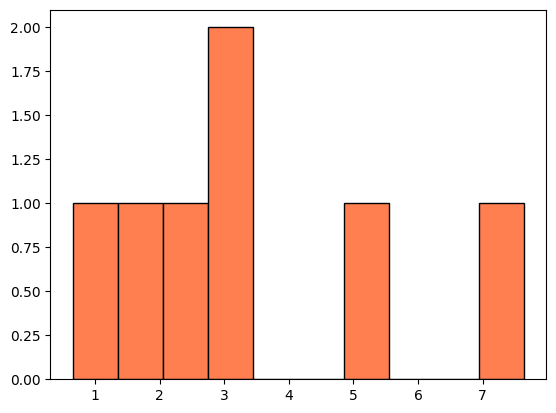

In [9]:
# Gráfica de la "small_gauss"
print(f'Cantidad de elementos de la "small-gauss": {len(small_gauss)}')

plt.hist(small_gauss, color = "coral", edgecolor = "black")
plt.show()

Cantidad de elementos de la "big_t": 50


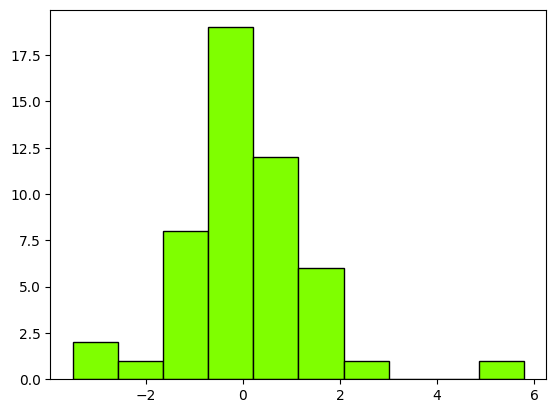

In [10]:
# Gráfica de la "big_t"
print(f'Cantidad de elementos de la "big_t": {len(big_t)}')
plt.hist(big_t, color = "chartreuse", edgecolor = "black")
plt.show()

Cantidad de elementos de la "big_gauss": 1000


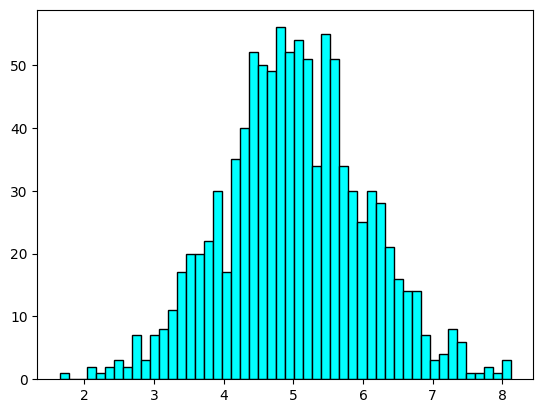

In [11]:
# Gráfica de la "big_gauss"
print(f'Cantidad de elementos de la "big_gauss": {len(big_gauss)}')
plt.hist(big_gauss, color = "cyan", edgecolor = "black", bins = 50)
plt.show()

Cantidad de elementos de "densidades_mexico.Population_Density": 27


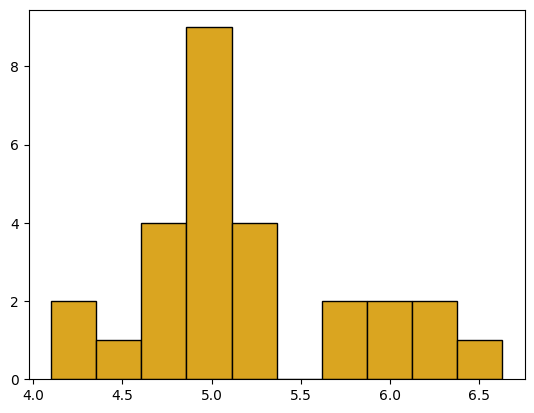

In [12]:
# Gráfica de la "densidades_mexico"
print(f'Cantidad de elementos de "densidades_mexico.Population_Density": {len(densidades_mexico.Population_Density)}')
plt.hist(densidades_mexico.Population_Density, color = "goldenrod", edgecolor = "black")
plt.show()

Cantidad de elementos de "mi_lognorm": 1000


<function matplotlib.pyplot.show(close=None, block=None)>

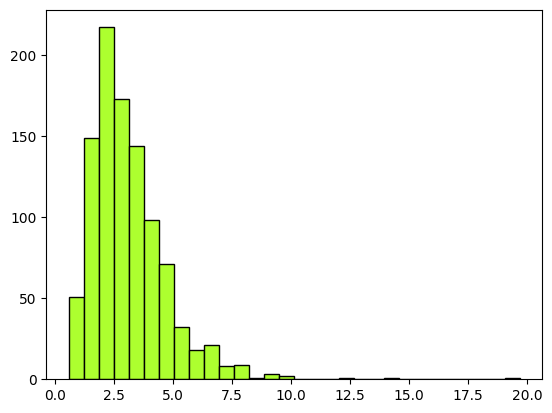

In [13]:
# Gráfica de la "mi_lognorm"
print(f'Cantidad de elementos de "mi_lognorm": {len(mi_lognorm)}')
plt.hist(mi_lognorm, color = "greenyellow", edgecolor = "black", bins = 30)
plt.show

<font color = 'deepskyblue'>
<font size = 5>

---

Gráficos Q-Q

<font color = 'Black'>
<font size = 3>

**¿Qué son los gráficos Q-Q?**

Un gráfico Q-Q (Quantile-Quantile) es una herramienta gráfica que compara la **distribución** de una **muestra** de **datos** con una **distribución teórica** específica (como la **distribución normal**). Ayuda a determinar si los **datos** siguen una **distribución** esperada.

**¿Cómo se interpretan?**

1. **Eje x:** Representa los **cuantiles teóricos** de la **distribución** de referencia.
2. **Eje y:** Representa los **cuantiles observados** en los **datos**.
3. **Línea diagonal:** Es la línea de referencia donde los puntos deberían alinearse si los **datos** siguen la **distribución teórica**.

**Interpretación**

- Si los puntos se alinean cercanamente con la línea diagonal, los **datos** se ajustan bien a la **distribución teórica**.
- Desviaciones significativas de la línea indican que los datos no siguen la **distribución teórica**.

**¿Para qué sirven?**

- Verificar la **normalidad** de los **datos**.
- Comparar la forma de dos **distribuciones**.
- Detectar la presencia de **colas largas** o **datos atípicos**.

**Conclusión**

Los gráficos Q-Q son una herramienta poderosa para evaluar visualmente si los **datos** siguen una **distribución teórica**, como la **normal**, y pueden complementar otras pruebas estadísticas como **Shapiro-Wilk** o **Kolmogorov-Smirnov**.


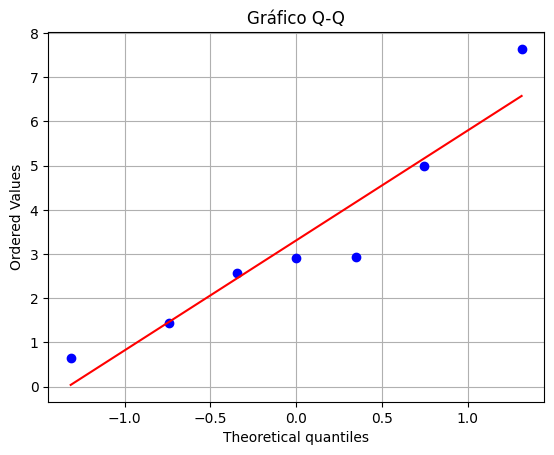

In [14]:
stats.probplot(small_gauss, dist = "norm", plot = plt)
plt.title("Gráfico Q-Q")
plt.grid(True)  # activa el grid
plt.show()

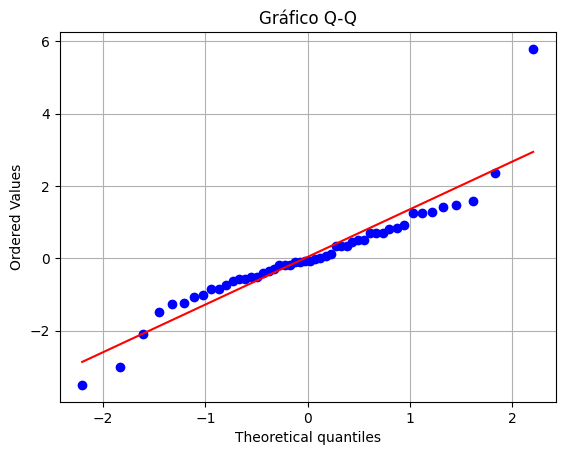

In [15]:
stats.probplot(big_t, dist = "norm", plot = plt)
plt.title("Gráfico Q-Q")
plt.grid(True)  # activa el grid
plt.show()

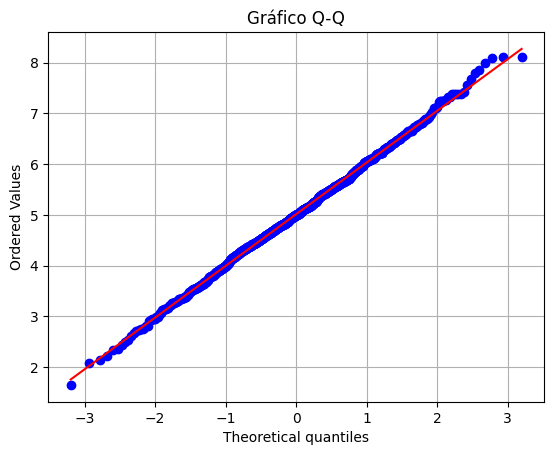

In [16]:
stats.probplot(big_gauss, dist = "norm", plot = plt)
plt.title("Gráfico Q-Q")
plt.grid(True)  # activa el grid
plt.show()

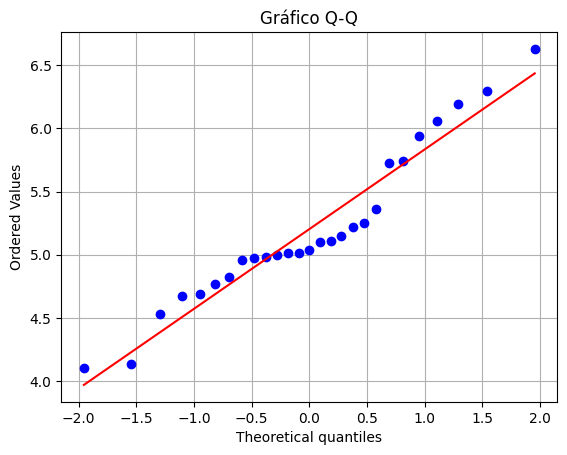

In [17]:
stats.probplot(densidades_mexico.Population_Density, dist = "norm", plot = plt)
plt.title("Gráfico Q-Q")
plt.grid(True)  # activa el grid
plt.show()

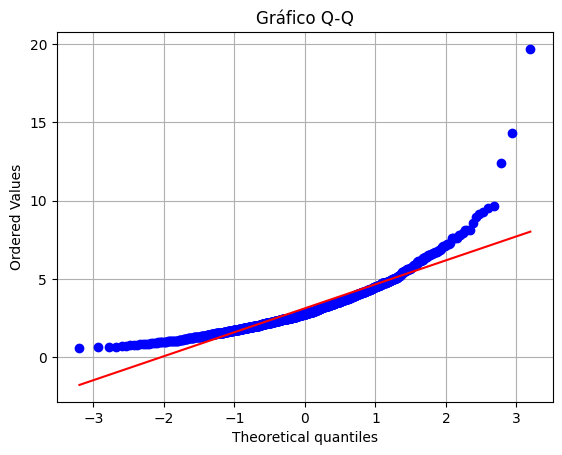

In [18]:
stats.probplot(mi_lognorm, dist = "norm", plot = plt)
plt.title("Gráfico Q-Q")
plt.grid(True)  # activa el grid
plt.show()